[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


Cardinalidad: 51057


<ipython-input-8-06852c7b770e>:41: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='overall', palette='viridis')


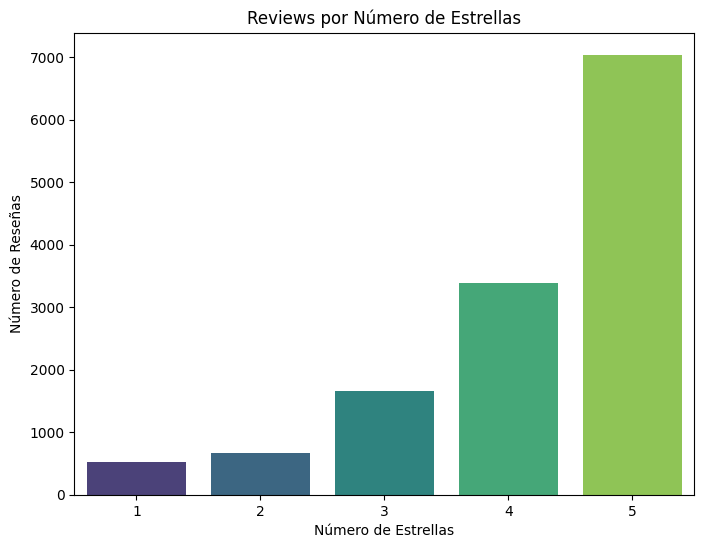

Número de reviews positivas: 10421
Número de reviews negativas: 2851
10 trigrams más frecuentes: [(('.', 'i', 'have'), 1802), (('.', 'it', 'is'), 1700), (('.', 'it', "'s"), 1693), (('i', 'do', "n't"), 1577), ((',', 'but', 'i'), 1465), (('&', '#', '34'), 1430), (('#', '34', ';'), 1430), (('this', 'is', 'a'), 1316), (('a', 'lot', 'of'), 1280), ((',', 'but', 'it'), 1212)]


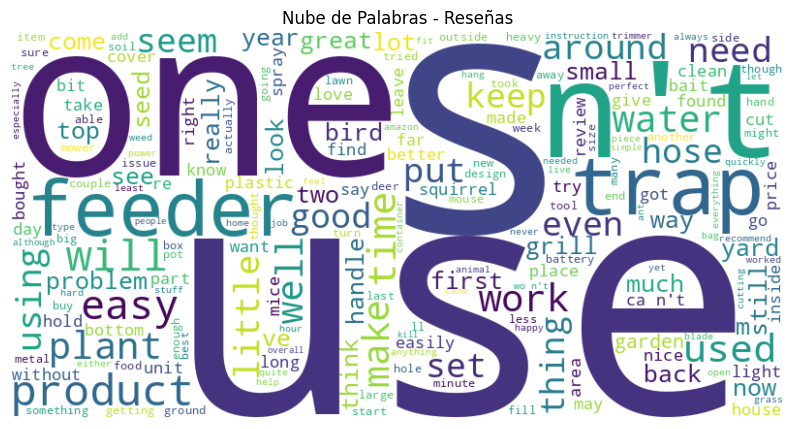

Palabras similares a 'quality':
  construction: 0.7505
  performance: 0.7407
  value: 0.6965
  fiskars: 0.6884
  materials: 0.6818
  solid: 0.6809
  durability: 0.6705
  overall: 0.6639
  price: 0.6565
  design: 0.6530

Palabras similares a 'high':
  low: 0.7402
  decent: 0.7191
  reasonable: 0.7103
  substantial: 0.6547
  thick: 0.6460
  good: 0.6265
  moderate: 0.6256
  determined.overall: 0.6214
  flexible: 0.6198
  weak: 0.6190

Palabras similares a 'love':
  enjoy: 0.7140
  loved: 0.6926
  appreciate: 0.6778
  liked: 0.6575
  beautiful: 0.5975
  loves: 0.5548
  recommend: 0.5517
  hate: 0.5414
  like: 0.5367
  hope: 0.5236

Palabras similares a 'recommend':
  reccomend: 0.7896
  recommended: 0.7503
  suggest: 0.7435
  reccomended: 0.7233
  purchase: 0.6816
  consider: 0.6800
  advise: 0.6683
  recomend: 0.6677
  six.so: 0.6617
  recommend.pam: 0.6609



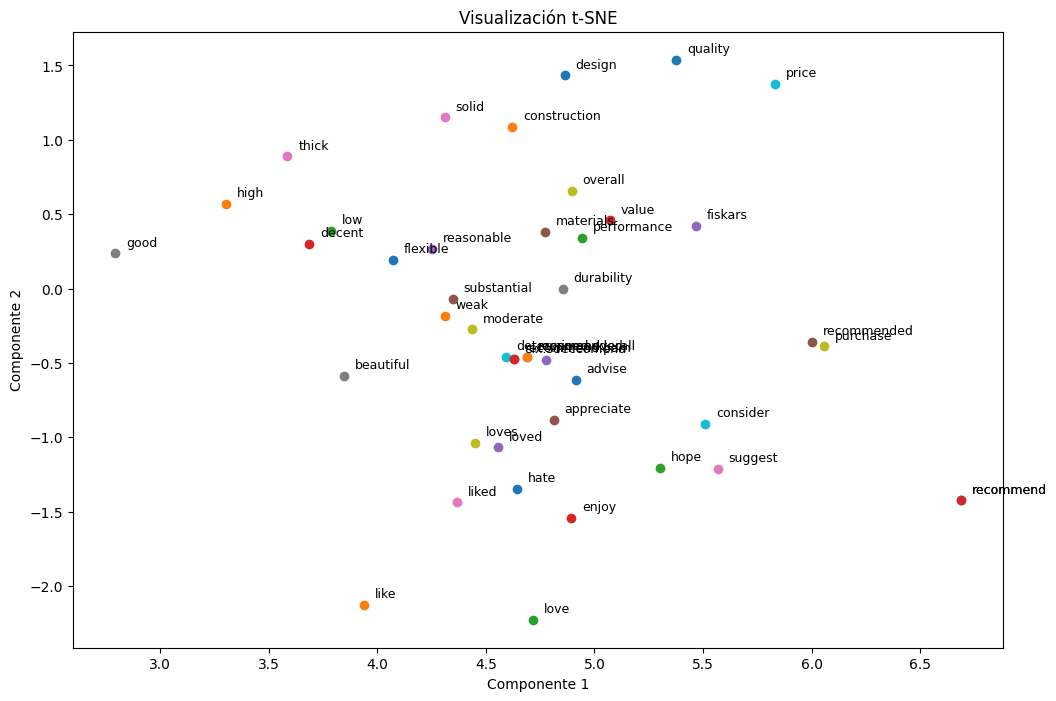

In [8]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from collections import Counter
from gensim.models import Word2Vec
from nltk import ngrams
from nltk.tokenize import word_tokenize
from sklearn.manifold import TSNE
from wordcloud import WordCloud
import nltk
import seaborn as sns
nltk.download('punkt_tab')


from google.colab import drive
drive.mount('/content/drive')


datasets_path = '/content/drive/My Drive/Colab Notebooks/NLP'
garden_json = 'Patio_Lawn_and_Garden_5.json'
file_path = f'{datasets_path}/{garden_json}'


df = pd.read_json(file_path, lines=True)

df['sentiment'] = df['overall'].apply(lambda rank: 0 if rank < 4 else 1)

# Tokenización
nltk.download('punkt')
df['tokens'] = df['reviewText'].apply(lambda x: word_tokenize(str(x).lower()))

# 1. Cardinalidad
vocab = set([word for tokens in df['tokens'] for word in tokens])
cardinalidad = len(vocab)
print(f"Cardinalidad: {cardinalidad}")

# 2.Reviews por número de estrellas
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='overall', palette='viridis')
plt.title('Reviews por Número de Estrellas')
plt.xlabel('Número de Estrellas')
plt.ylabel('Número de Reseñas')
plt.show()

# 3.reviews positivas y negativas
positivas = df[df['overall'] >= 4].shape[0]
negativas = df[df['overall'] < 4].shape[0]
print(f"Número de reviews positivas: {positivas}")
print(f"Número de reviews negativas: {negativas}")

# 4. N-grams
df['trigrams'] = df['tokens'].apply(lambda x: list(ngrams(x, 3)))
all_trigrams = [trigram for trigram_list in df['trigrams'] for trigram in trigram_list]
trigram_freq = Counter(all_trigrams)
print(f"10 trigrams más frecuentes: {trigram_freq.most_common(10)}")

# 5.Nube de palabras
all_words = ' '.join([word for tokens in df['tokens'] for word in tokens])
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_words)
plt.figure(figsize=(10, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Nube de Palabras - Reseñas')
plt.show()

# 6.Word2Vec
model = Word2Vec(sentences=df['tokens'], vector_size=100, window=5, min_count=1, workers=4)
model.save("word2vec_model.model")

# Palabras similares
words_to_explore = ['quality', 'high', 'love', 'recommend']
similar_words = {}
for word in words_to_explore:
    similar_words[word] = model.wv.most_similar(word, topn=10)

for word, sims in similar_words.items():
    print(f"Palabras similares a '{word}':")
    for sim_word, score in sims:
        print(f"  {sim_word}: {score:.4f}")
    print()

#  Visualización t-SNE
embedding_matrix = []
labels = []


for word in words_to_explore:
    embedding_matrix.append(model.wv[word])
    labels.append(word)
    for similar_word, _ in model.wv.most_similar(word, topn=10):
        embedding_matrix.append(model.wv[similar_word])
        labels.append(similar_word)

embedding_matrix = np.array(embedding_matrix)
tsne = TSNE(n_components=2, random_state=0)
reduced_embeddings = tsne.fit_transform(embedding_matrix)

plt.figure(figsize=(12, 8))
for i, label in enumerate(labels):
    plt.scatter(reduced_embeddings[i, 0], reduced_embeddings[i, 1])
    plt.text(reduced_embeddings[i, 0] + 0.05, reduced_embeddings[i, 1] + 0.05, label, fontsize=9)

plt.title('Visualización t-SNE')
plt.xlabel('Componente 1')
plt.ylabel('Componente 2')
plt.show()


Conclusiones:
- Se observa que hay muchas más reseñas positivas (10,421) que negativas (2,851).
- Algunas combinaciones frecuentes incluyen expresiones comunes como (". i have", "it is", "i do n't"), lo que indica estructuras gramaticales típicas en reseñas. Se detectaron algunos caracteres especiales (&, #, ;), lo que sugiere que se podría mejorar el preprocesamiento eliminando estos elementos innecesarios.
- Se podría probar un modelo con word embeddings (como Word2Vec o TF-IDF) para capturar mejor el significado de las palabras.










In [9]:
import nltk
import re
import unicodedata
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')


lemmatizer = WordNetLemmatizer()


stop_words = set(stopwords.words('english'))

# Función para eliminar acentos
def remove_accents(input_str):
    nfkd_form = unicodedata.normalize('NFKD', input_str)
    return ''.join([c for c in nfkd_form if not unicodedata.combining(c)])


def preprocess_review(text):

    text = remove_accents(text)
    text = text.lower()
    text = re.sub(r'[^a-z\s]', '', text)

    tokens = word_tokenize(text)

    tokens = [word for word in tokens if word not in stop_words]

    lemmatized_tokens = [lemmatizer.lemmatize(word) for word in tokens]

    return ' '.join(lemmatized_tokens)


df['processed_reviews'] = df['reviewText'].apply(preprocess_review)
df[['reviewText', 'processed_reviews']].head()


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


,reviewText,processed_reviews
0,Good USA company that stands behind their prod...,good usa company stand behind product warranty...
1,This is a high quality 8 ply hose. I have had ...,high quality ply hose good luck gilmour hose p...
2,It's probably one of the best hoses I've ever ...,probably one best hose ive ever hadpros good e...
3,I probably should have bought something a bit ...,probably bought something bit flexible less ru...
4,I bought three of these 5/8-inch Flexogen hose...,bought three inch flexogen hose feetfor differ...


In [10]:

df.to_csv('/content/drive/My Drive/Colab Notebooks/NLP/preprocessed_data.csv', index=False)


